<a href="https://colab.research.google.com/github/Ojas-Sri/Credit-Card-Default-Prediction/blob/main/Python%20Notebooks%20/%20Stage_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>MID SEM SUBMISSION</center>
**<center>Machine Learning Group-1 : Credit Default Detection in Financial Systems using Statistical Analysis**
<br>
*Supervisor: Prof Madan Gopal*
<br>
*Ojas Srivastava & Yatharth Jain*
</center>

---




## Variables
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

---


##Importing Important Libraries

In [ ]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
!pip install plotnine -q
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing Dataset

Connecting our Gdrives and calling data from there

In [ ]:
# Load the data
#Integrating Gdrive
from google.colab import drive
drive.mount('/content/drive/')

# Run this and click on the link to get the Authorization code and then head over to
# files to Gdrive mounte

Mounted at /content/drive/


In [ ]:
 #Location on Ojas's Gdrive Folders
 location = "/content/drive/My Drive/Minor Project (Machine Learning)/Credit Default /UCI_Credit_Card.csv"

#Importing the data
 df = pd.read_csv(location)
 #Inspecting the Data
 df.sample(5)
# Import Successful

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
14465,14466,20000.0,1,2,2,38,2,-1,-1,-1,-1,-1,1442.0,1261.0,390.0,390.0,390.0,930.0,1261.0,390.0,390.0,390.0,930.0,0.0,0
26002,26003,280000.0,2,2,2,46,0,0,2,2,0,0,29523.0,154398.0,151984.0,47851.0,49374.0,50198.0,126000.0,3000.0,0.0,3000.0,2000.0,2000.0,0
28149,28150,50000.0,2,3,1,49,2,2,2,0,0,0,47934.0,48950.0,47891.0,98284.0,19950.0,20007.0,2100.0,0.0,5400.0,1000.0,900.0,1000.0,0
24798,24799,140000.0,1,2,1,35,1,2,2,0,0,0,147946.0,150934.0,136222.0,124871.0,118141.0,111716.0,7000.0,10.0,6015.0,4000.0,4000.0,5000.0,0
7104,7105,390000.0,2,1,2,37,-1,-1,-1,-1,-1,-1,20666.0,20666.0,10000.0,20666.0,10000.0,10000.0,20666.0,10000.0,20666.0,10000.0,10000.0,10500.0,0


### Data Info & Structure 

In [ ]:
# DATA STRUCTURE
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

<font color="red">Overall the data has no missing values and is all in numeric terms, with 30,000 entries.<br>
<br>
No missing data, but a few anomalous things:
<br>
* EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.
* MARRIAGE has a label 0 that is undocumented
</font>


---



In [ ]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


<font color="red">They all present an undocumented label -2. If 1,2,3, etc are the months of delay, 0 should be labeled 'pay duly' and every negative value should be seen as a 0. But we will get to that late.
</font>

---



In [ ]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


<font color="red"> Negative values can be interpreted as credit?

---

In [ ]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [ ]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [ ]:
# Analysis of Persons Socio Economic Indicators
df[['SEX','EDUCATION','MARRIAGE','AGE']].describe()

,SEX,EDUCATION,MARRIAGE,AGE
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,35.485500
std,0.489129,0.790349,0.521970,9.217904
min,1.000000,0.000000,0.000000,21.000000
25%,1.000000,1.000000,1.000000,28.000000
50%,2.000000,2.000000,2.000000,34.000000
75%,2.000000,2.000000,2.000000,41.000000
max,2.000000,6.000000,3.000000,79.000000


<font color="red">We notice the following things about our clients:<br>
<br>
* SEX (encoded as 1 = male & 2 = female) has a mean of 1.6 and median of 2 which means we have more female customers than male customers 
* MARRIAGE(encoded as 1=married, 2=single, 3=others) we see that the mean is around 1 and median as well as 75th quartile being 2 means a considerable amount of clients are married or single
* EDUCATION (encoded as 1=graduate, 2=uni, 3=high school, 4=others, 5=unknown,6=unknown) shows that most  clients are graduates
</font>



##Exploratory Analysis

In-depth visualised analysis

----

###Imbalance in Dataset

In [ ]:
df=df.rename(columns={'default.payment.next.month':'def_pay','PAY_0':'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


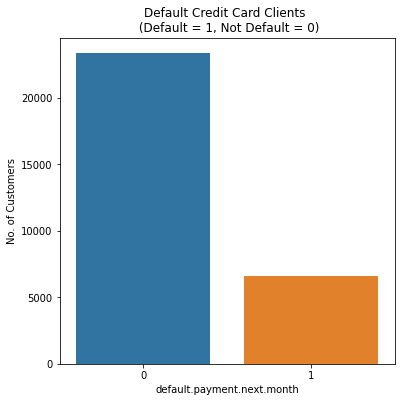

In [ ]:
temp = df['def_pay'].copy()
temp=temp.value_counts()

dt= pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients \n (Default = 1, Not Default = 0)')
sns.set_color_codes("pastel")
g=sns.barplot(x = 'default.payment.next.month', y="values", data=dt).set(ylabel='No. of Customers')
locs, labels = plt.xticks()

In [ ]:
n1= (temp.values[0]/(temp.values[0]+temp.values[1]))*100
n2= (temp.values[1]/(temp.values[0]+temp.values[1]))*100
print(f'Percentage of Non-Defaulters:-->{n1}%')
print(f'Percentage of Defaulters:--> {n2}%')

Percentage of Non-Defaulters:-->77.88000000000001%
Percentage of Defaulters:--> 22.12%


###Amount of Credit Limit

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

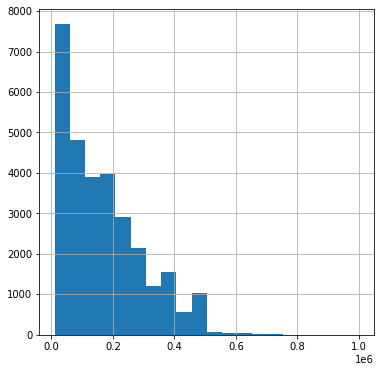

In [ ]:
df.LIMIT_BAL.hist(bins = 20,figsize=(6,6))
df.LIMIT_BAL.describe()

###Age Distribution

Text(0.5, 0, 'Age(in years)')

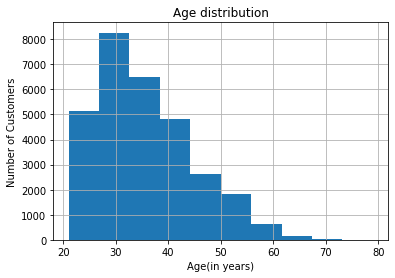

In [ ]:
df.AGE.hist()
import pylab as pl
pl.title("Age distribution")
pl.ylabel("Number of Customers")
pl.xlabel("Age(in years)")

<font color="red"> This graph directly shows that credit was extended to the younger section of the society. The elder , people with  more purchasing power, got less credit cards
<br>
However, we also need to check what was the credit(LIMIT_BAL) got in comparison with elders 

###Gender

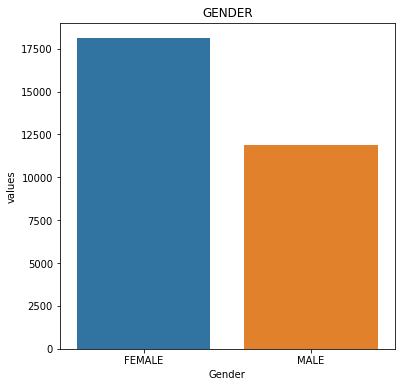

In [ ]:
temp = df['SEX'].copy()
temp=temp.value_counts()
dt= pd.DataFrame({'Gender':["FEMALE","MALE"],'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('GENDER')
sns.set_color_codes("pastel")
g=sns.barplot(x = 'Gender', y="values", data=dt)
locs, labels = plt.xticks()

<font color="red"> More Women than Men

###Marriage

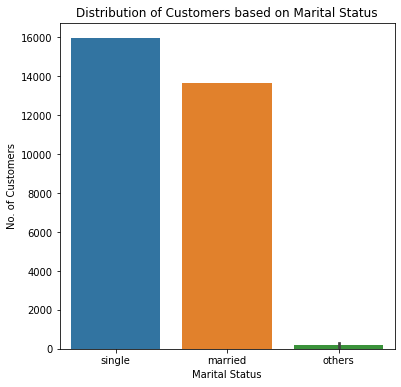

In [ ]:
temp = df['MARRIAGE'].copy()
temp=temp.value_counts()
temp.head()
dt= pd.DataFrame({'Marriage':["single","married","others","others"],'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Distribution of Customers based on Marital Status')
sns.set_color_codes("pastel")
g=sns.barplot(x = 'Marriage', y="values", data=dt).set(ylabel='No. of Customers',xlabel='Marital Status')
locs, labels = plt.xticks()

<font color="red"> On the outset of basic analysis, I feel that much credit was given to single and young people. Although, one can not say if they were the defaulters largely. I will analyse further

<font size=6 color='green'> At this point I would like to do Data Cleaning which will then be followed by further analysis

##Data Cleaning

The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4

In [ ]:
# FIXING EDUCATION
fill = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fill, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
#FIXING MARRIAGE
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

According to our documentation, the PAY_n variables indicate the number of months of delay and indicates "pay duly"with -1. 

We also have -2 & 0. It seems that the label has to be adjusted to 0 for pay duly.



In [ ]:
#Renaming PAY_0 to PAY_1
df=df.rename(columns={'PAY_0':'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
#Renaming PAY_0 to PAY_1
df=df.rename({'PAY_0':'PAY_1'})

#Fixing the PAY_n
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0

df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000
mean,0.356767,0.320033,0.304067,0.258767,0.22150
std,0.760594,0.801727,0.790589,0.761113,0.71772
min,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.00000
max,8.000000,8.000000,8.000000,8.000000,8.00000


<font color='red'> Cleaned PAY_n

##Further Exploratory Analysis

###Analysis of AGE, Marriage, SEX

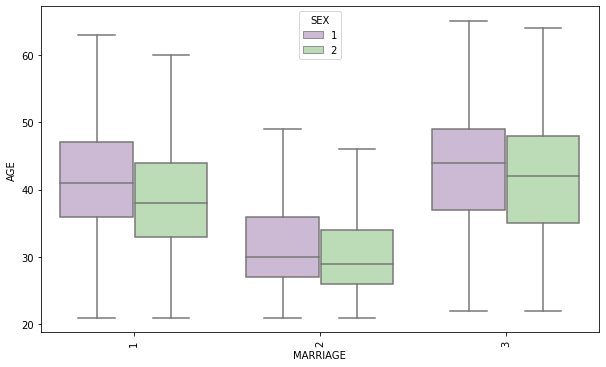

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10,6))
s = sns.boxplot(ax = ax1, x='MARRIAGE', y='AGE', hue='SEX',data=df, palette="PRGn",showfliers=False)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();

<font color='red'> Marriage status meaning is:

    1 : married
    2 : single
    3 : others

<font color='red'>Sex meaning is:

    1 : male
    2 : female



<font color='red'>It looks like Married status 3 (others), with mean values over 40 and Q4 values over 60 means mostly vidowed or divorced whilst Married status 0 could be not specified or divorced, as Q1 values are above values for married of both sexes.<br>
<br>
Married males have mean age above married women. Unmarried males have mean value for age above unmarried women as well but closer. Q3 abd Q4 values for married man are above corresponding values for married women
</font>
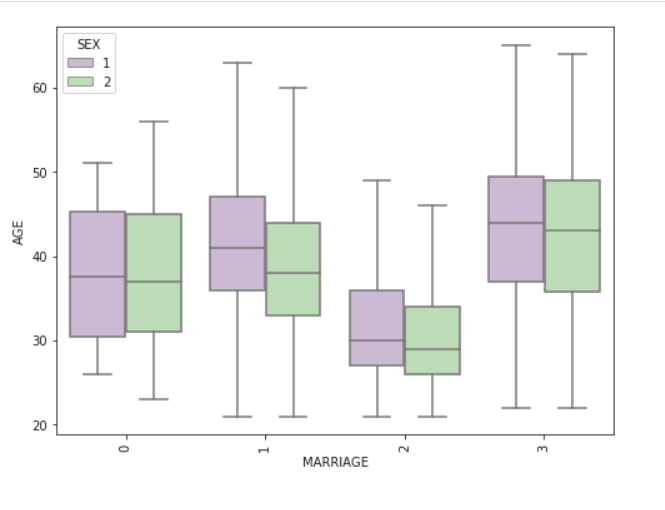
---

###LIMIT_BAL v/s SEX
Here we investigate the credit limit distribution vs sex

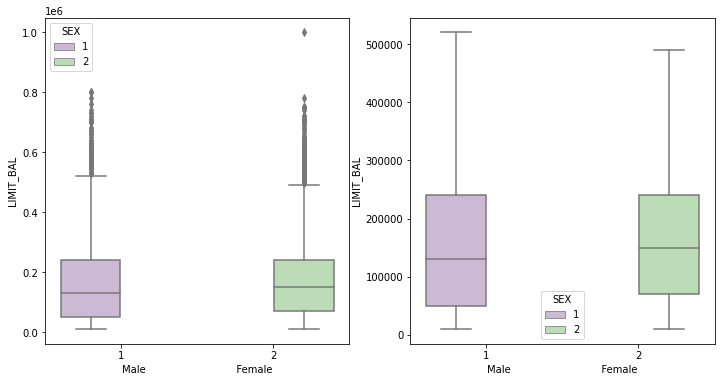

In [ ]:
#Making 2 box plots , one with Outliers and without them
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=True).set(xlabel='Male                             Female')
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=False).set(xlabel='Male                             Female')
plt.show();

plkk

<font color='red'> We see that Males & Females have similar credit limits , however males have also got a few lower limit credit cards than females. 

In [ ]:
gender=pd.crosstab(df.SEX, df.def_pay)
gender['default_perc'] = (gender[1]/(gender[0] + gender[1])) 
gender

def_pay,0,1,default_perc
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


<font color='red'> We see that Males have a higher percentage of default amongst the clients

###corr_2_cols function declaration

In [ ]:
# defining a function for ease of making tables for default by Variable type
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

###Education v/s default

In [ ]:
corr_2_cols('EDUCATION', 'def_pay')

def_pay,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


<font color='red'>
It seems that the higher is the education, the lower is the probability of defaulting the next month. Only exception is for the category labeled "Other" that, if we stick to the documentation, would be lower than high school. However, numerically they will not have much weight in the final result as they are just a meagre portion of the whole data.

###Marriage v/s Default

In [ ]:
corr_2_cols('MARRIAGE', 'def_pay')

def_pay,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


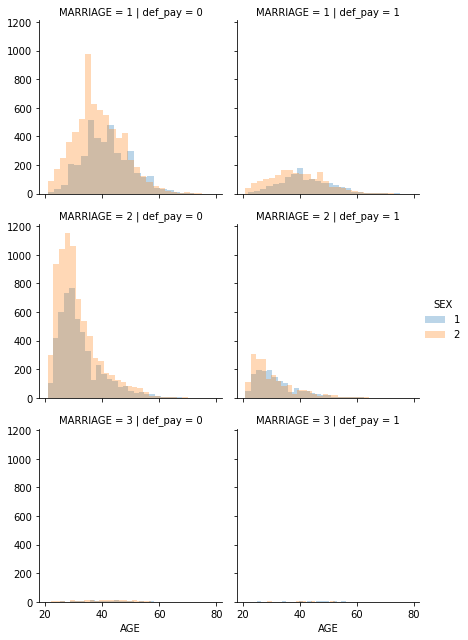

In [ ]:
g = sns.FacetGrid(df, col='def_pay', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()

<font color='red'> I can not make sense of these graphs, yatharth may add something

###SEX v/s default

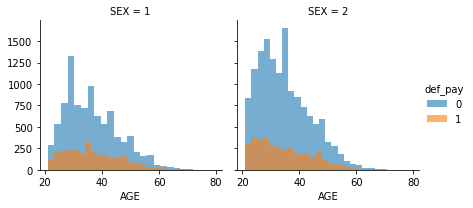

In [ ]:
g = sns.FacetGrid(df, col='SEX', hue='def_pay')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

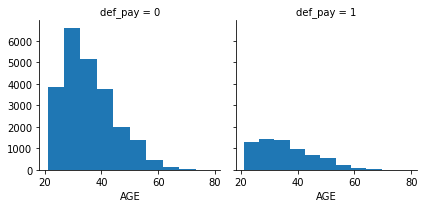

In [ ]:
g = sns.FacetGrid(df, col = 'def_pay')
g.map(plt.hist, 'AGE')

###Features Correlation

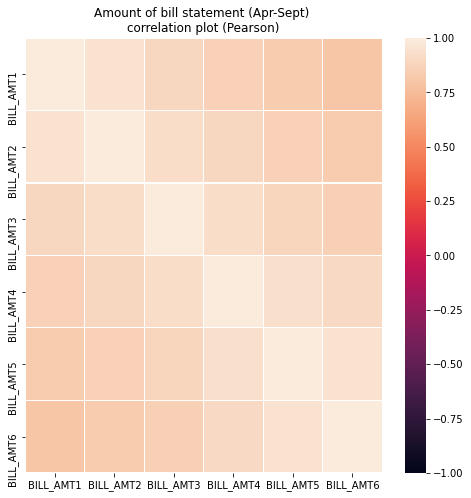

In [ ]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

<font color='red'>We see that the correlation between the bill amounts of clients decrease as the distance of months increase. This may mean that there is considerable variation in consumption patterns of customers over months. 

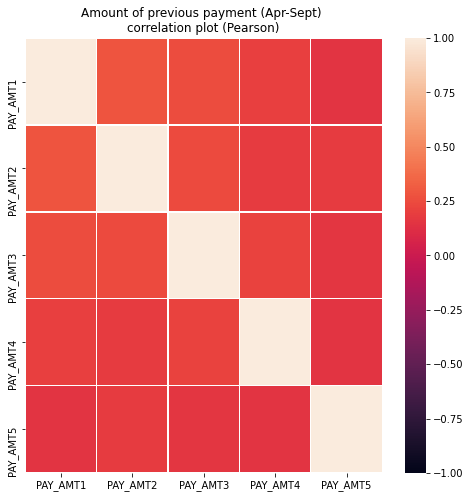

In [ ]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

<font color='red'> We again witness a decreasing correlation with increasing distance between months. I could say that there is a stark variability in consumption & spending patterns of clients over months. However the payment data is uncorrelated by a higher degree than the billed amount data. This needs further investigation.


---

##Feature Engineering (Beginners)

We both discussed and decided to make bins for the numerical data to get a broader idea and account for unnecessary noise in the data.

In [ ]:
non_feat_engg_data = df
df.to_csv('/content/drive/My Drive/Minor Project (Machine Learning)/Cleaned_data.csv',index=False)

###Bins for Single men, women & married men,women & divorced or widowed men,women

In [ ]:
df['SE_MA'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'SE_MA'] = 1 #married man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'SE_MA'] = 2 #single man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'SE_MA'] = 3 #divorced man
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'SE_MA'] = 4 #married woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'SE_MA'] = 5 #single woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'SE_MA'] = 6 #divorced woman
corr_2_cols('SE_MA', 'def_pay')

def_pay,0,1,perc
SE_MA,,,
1,3844,1346,0.259345
2,5068,1485,0.226614
3,103,42,0.289655
4,6609,1860,0.219625
5,7555,1856,0.197216
6,185,47,0.202586


<font color='red'>For the sake of readability

    1=married man
    2=single man
    3=divorced man
    4=married woman
    5=single woman
    6=divorced woman

<font color='red' size=5> From this data we see that Married & divorced/widower men are the highly likely to default. While for women it is somewhat constant to default throughout </font>

###Bins for Age-group

In [ ]:
df.AGE.describe()

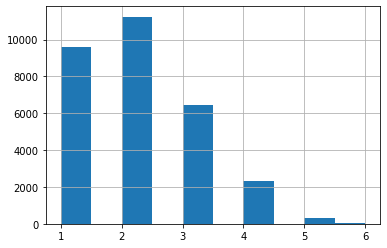

In [ ]:
df['AgeBin'] = 0 #creates a column of 0
df.loc[((df['AGE'] > 20) & (df['AGE'] < 30)) , 'AgeBin'] = 1
df.loc[((df['AGE'] >= 30) & (df['AGE'] < 40)) , 'AgeBin'] = 2
df.loc[((df['AGE'] >= 40) & (df['AGE'] < 50)) , 'AgeBin'] = 3
df.loc[((df['AGE'] >= 50) & (df['AGE'] < 60)) , 'AgeBin'] = 4
df.loc[((df['AGE'] >= 60) & (df['AGE'] < 70)) , 'AgeBin'] = 5
df.loc[((df['AGE'] >= 70) & (df['AGE'] < 81)) , 'AgeBin'] = 6
df.AgeBin.hist()
import pylab as pl
pl.title("Number of customers v/s AgeBin")
pl.ylabel("Number of Customers")
pl.xlabel("Age")

<font color='red'> For the sake of readability:

    bin 1= (20,30)
    bin2=[30,40)
    bin 3=[40,50)
    bin 4=[50,60)
    bin 5=[60,70)
    bin 3=[70,81)

---

In [ ]:
corr_2_cols('AgeBin', 'def_pay')

def_pay,0,1,perc
AgeBin,,,
1,7421,2197,0.228426
2,8962,2276,0.202527
3,4979,1485,0.229734
4,1759,582,0.248612
5,225,89,0.283439
6,18,7,0.280000


<font color='red'> It seems people above the age of 60 tend to have a higher default chances

In [ ]:
#df.to_csv('/content/drive/My Drive/Minor Project (Machine Learning)/Credit Default/Cleaned_featured_data.csv')

In [ ]:
#df.to_csv('/content/drive/My Drive/Minor Project (Machine Learning)/Cleaned_featured_data.csv',index=False)

## Models
Here we try to use some well-known classifiers.

In [ ]:
#features
X=df.drop('def_pay',axis=1)
X=X.drop('SEX',axis=1)
X=X.drop('MARRIAGE',axis=1)
X=X.drop('AGE',axis=1)
X.info()
#predicted class
y=df.def_pay

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   EDUCATION  30000 non-null  int64  
 3   PAY_1      30000 non-null  int64  
 4   PAY_2      30000 non-null  int64  
 5   PAY_3      30000 non-null  int64  
 6   PAY_4      30000 non-null  int64  
 7   PAY_5      30000 non-null  int64  
 8   PAY_6      30000 non-null  int64  
 9   BILL_AMT1  30000 non-null  float64
 10  BILL_AMT2  30000 non-null  float64
 11  BILL_AMT3  30000 non-null  float64
 12  BILL_AMT4  30000 non-null  float64
 13  BILL_AMT5  30000 non-null  float64
 14  BILL_AMT6  30000 non-null  float64
 15  PAY_AMT1   30000 non-null  float64
 16  PAY_AMT2   30000 non-null  float64
 17  PAY_AMT3   30000 non-null  float64
 18  PAY_AMT4   30000 non-null  float64
 19  PAY_AMT5   30000 non-null  float64
 20  PAY_AM

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_val_score 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Feature Scaling 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [ ]:
# Fitting Kernel SVM to the Training set 
classifier = SVC(kernel = 'rbf', random_state = 0,  ) 
classifier.fit(X_train, y_train) 
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('ACCURACY RATE: ',(cm[0,0]+cm[1,1])/90)
print('ERROR RATE:',(cm[0,1]+cm[1,0])/90)

[[6727  333]
 [1265  675]]
ACCURACY RATE:  82.24444444444444
ERROR RATE: 17.755555555555556


In [ ]:
for i in range (5,11):
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = i) 
    print('Mean Accuracy when k=',i,'=',accuracies.mean())

Mean Accuracy when k= 5 = 0.8181904761904761
Mean Accuracy when k= 6 = 0.8177142857142856
Mean Accuracy when k= 7 = 0.8175714285714285
Mean Accuracy when k= 8 = 0.8176190476190477
Mean Accuracy when k= 9 = 0.8171896593217157
Mean Accuracy when k= 10 = 0.8174285714285714


In [ ]:
from sklearn.ensemble import RandomForestClassifier
for i in range (7,11):
    classifier=RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    cm=confusion_matrix(y_test, y_pred)
    print('-------ESTIMATORS=',i,'-------')
    print(cm)
    print('ACCURACY RATE: ',(cm[0,0]+cm[1,1])/90)
    print('ERROR RATE:',(cm[0,1]+cm[1,0])/90)

-------ESTIMATORS= 7 -------
[[6516  544]
 [1252  688]]
ACCURACY RATE:  80.04444444444445
ERROR RATE: 19.955555555555556
-------ESTIMATORS= 8 -------
[[6670  390]
 [1365  575]]
ACCURACY RATE:  80.5
ERROR RATE: 19.5
-------ESTIMATORS= 9 -------
[[6550  510]
 [1254  686]]
ACCURACY RATE:  80.4
ERROR RATE: 19.6
-------ESTIMATORS= 10 -------
[[6696  364]
 [1342  598]]
ACCURACY RATE:  81.04444444444445
ERROR RATE: 18.955555555555556


In [ ]:
for i in range (7,11):
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = i) 
    print('Mean Accuracy when k=',i,'=',accuracies.mean()*100)

Mean Accuracy when k= 7 = 80.41428571428571
Mean Accuracy when k= 8 = 80.11904761904762
Mean Accuracy when k= 9 = 80.46181894267427
Mean Accuracy when k= 10 = 80.24761904761904


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [ ]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [ ]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('------------------------')
print(accuracy_score(y_test,y_pred))
print('------------------------')
print(classification_report(y_test,y_pred))

[[7025    1]
 [1974    0]]
------------------------
0.7805555555555556
------------------------
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7026
           1       0.00      0.00      0.00      1974

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('------------------------')
print(accuracy_score(y_test,y_pred))
print('------------------------')
print(classification_report(y_test,y_pred))

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

[[6661  365]
 [1232  742]]
------------------------
0.8225555555555556
------------------------
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7026
           1       0.67      0.38      0.48      1974

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.81      0.82      0.80      9000

